<a href="https://colab.research.google.com/github/overgithubitttttt/ML-PROJECT/blob/main/AutoEncoder_based_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1 #ahhhh
from tensorflow.keras.optimizers import Adam

In [ ]:
def plot_encoder_outputs(autoencoder, n, dims, x_test):
  decoded_imgs = autoencoder.predict(x_test) #shudn't we pass x_test too?

  n = 5
  plt.figure(figsize=(10, 4.5))
  for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.gray()
    plt.imshow(x_test[i].reshape(*dims)) #is reshape necessary?
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    if i == n/2:
      ax.set_title("Original Images")

    ax = plt.subplot(2, n, n+i+1)
    plt.gray()
    plt.imshow(decoded_imgs[i].reshape(*dims))
    if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()




In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


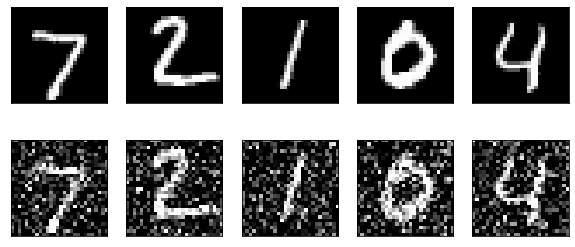

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [ ]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1609
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1176
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1146
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1115
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1105
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1097
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1091
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1085


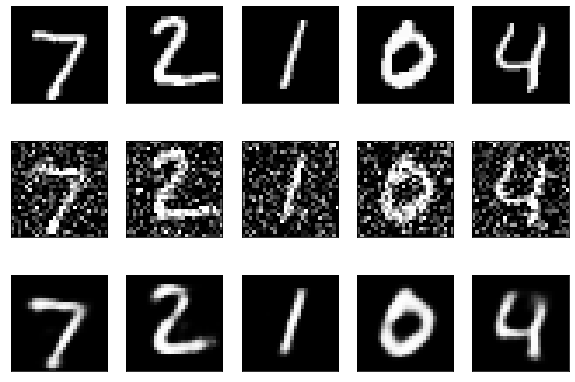

In [ ]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

    # plot decoded image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')